**Convolutional Neural Networks (CNN)**

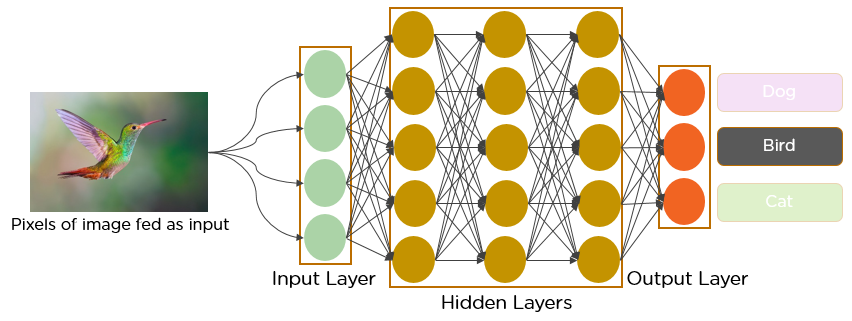

CNN - Components :

1. Convolutional layer
2. Pooling Layer
3. Fully connected Layer  

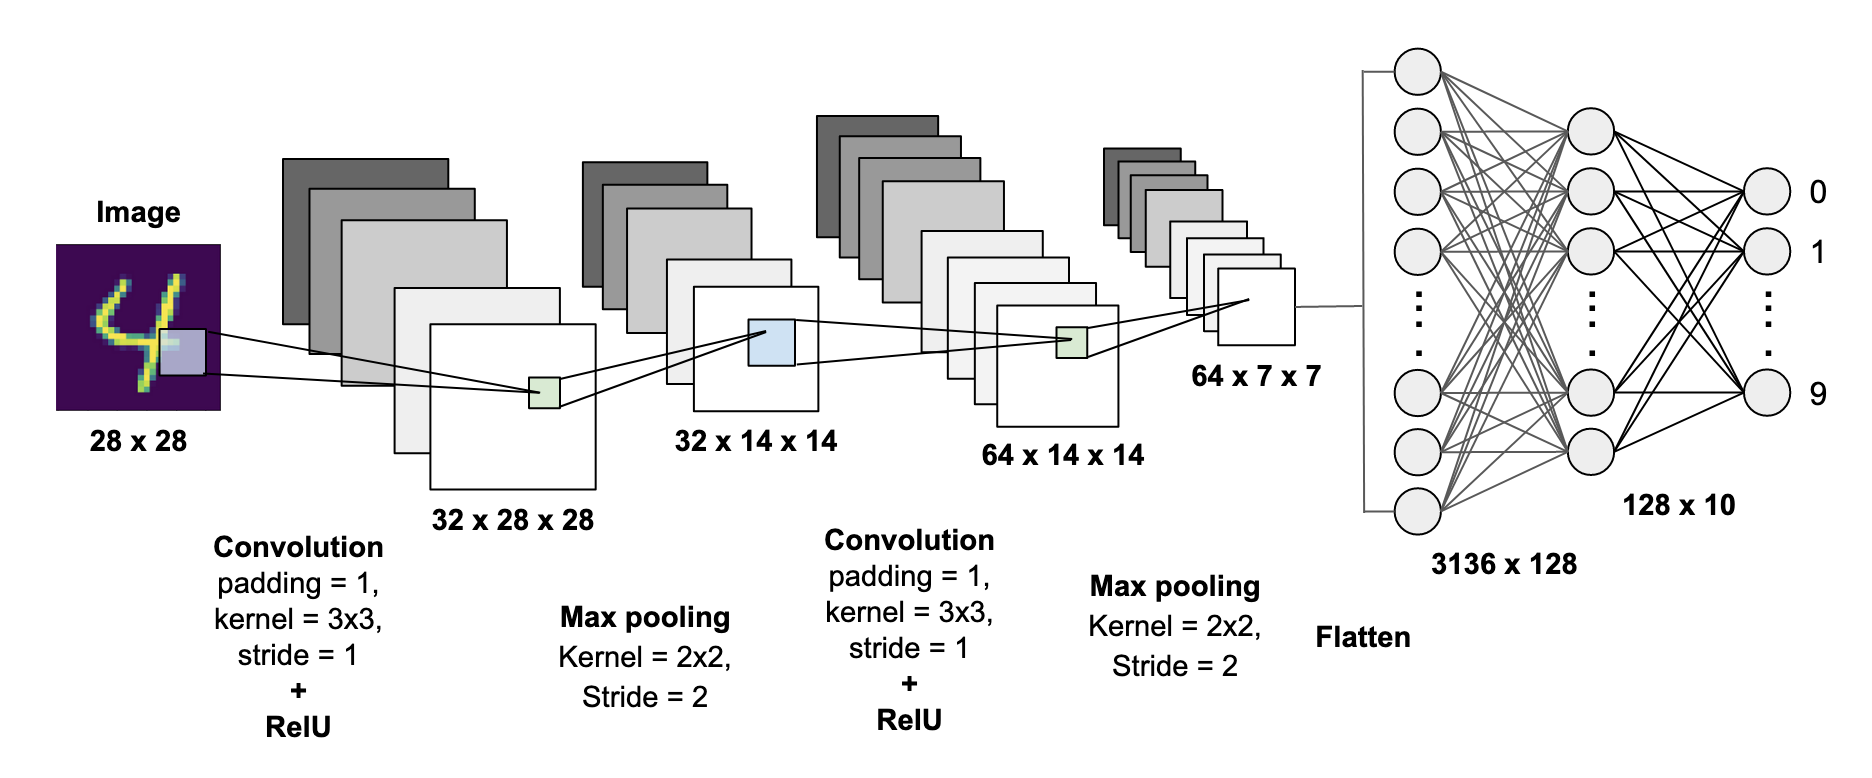

CNN - Evaluation

1. Accuracy
2. Precision
3. Recall
4. F1 Score

Type of CNN Model:

1. LeNet
2. AlexNet
3. Resnet
4. GoogleNet
5. MobileNet
6. VGG

In [1]:
#pakcages:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset !!

train  = pd.read_csv('/content/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('/content/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [5]:
Y_train = train['label']

X_train = train.drop(labels = ['label'], axis=1)

In [11]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

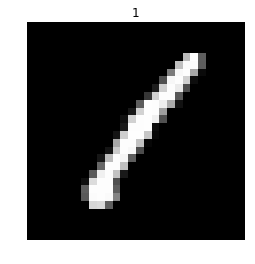

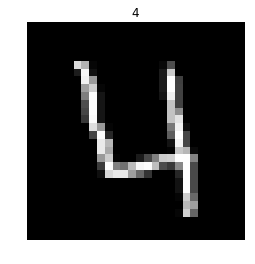

In [12]:
X_train = X_train / 255.0
test = test / 255.0

print('X_train shape:', X_train.shape)
print('X test shape:', test.shape)

X_train shape: (42000, 784)
X test shape: (28000, 784)


In [13]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28,28, 1)

print('X_train shape:', X_train.shape)
print('X test shape:', test.shape)

X_train shape: (42000, 28, 28, 1)
X test shape: (28000, 28, 28, 1)


In [16]:
# label encoding !
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=10)

In [17]:
# Split data into Train & test !!

from sklearn.model_selection import train_test_split

X_train, X_val , Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=21)

print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


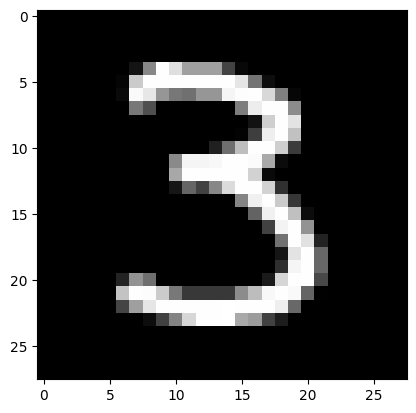

In [23]:
plt.imshow(X_train[3][:,:,0],cmap='gray')
plt.show()

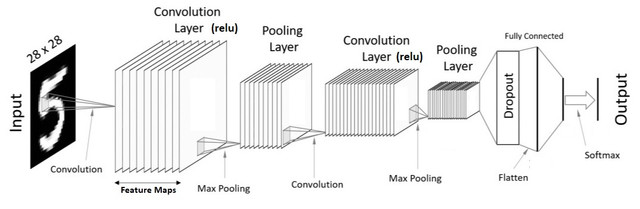

 Convolution:

 1. Image - feature detection in 3 x 3
 2. 3 x 3, 5 x 5 , 7 x 7  
 3. Kearnal / filter  
 4. feature map (input image, featrue detection)  
 5. stride - navigate the input image

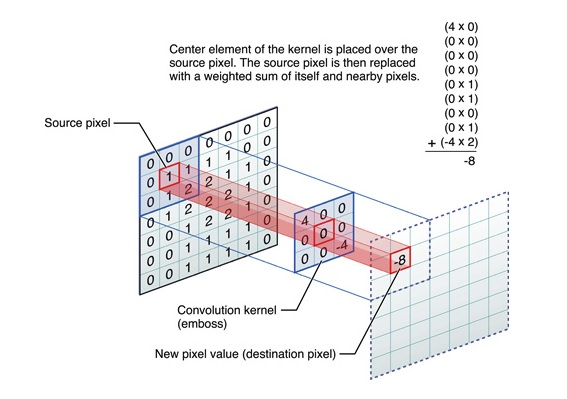


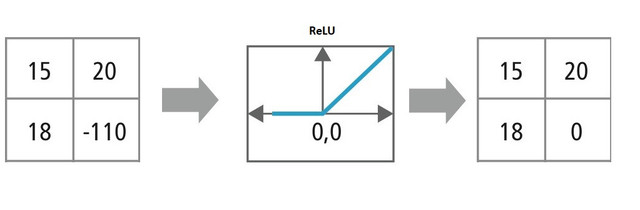

Max Pooling:

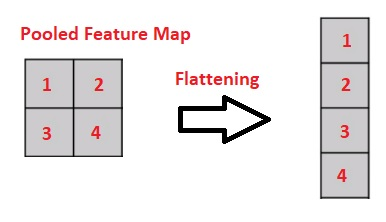

In [ ]:
# Create Model
# Con => Max Pool => Dropout =>Conv => Max pool => dropout => fully connected (2 layer> )

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools

from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [29]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))

cnn_model.add(MaxPool2D(pool_size = (2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu'))
cnn_model.add(MaxPool2D(pool_size = (2,2),strides=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation = 'softmax'))

In [30]:
cnn_model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [33]:
datagen = ImageDataGenerator(
    featurewise_center= False,
    samplewise_center= False,
    featurewise_std_normalization= False,
    samplewise_std_normalization= False,
    zca_whitening= False,
    rotation_range=5,
    zoom_range= 0.1,
    width_shift_range=0.1,
    height_shift_range= 0.1,
    horizontal_flip= False,
    vertical_flip=False)
datagen.fit(X_train)

In [35]:
history = cnn_model.fit(datagen.flow(X_train, Y_train, batch_size = 50),
                        epochs = 10, validation_data=(X_val, Y_val),
                        steps_per_epoch=X_train.shape[0]//50)

Epoch 1/10
756/756 [==============================] - 41s 47ms/step - loss: 0.6587 - accuracy: 0.7808 - val_loss: 0.1080 - val_accuracy: 0.9724
Epoch 2/10
756/756 [==============================] - 35s 47ms/step - loss: 0.2761 - accuracy: 0.9140 - val_loss: 0.0740 - val_accuracy: 0.9788
Epoch 3/10
756/756 [==============================] - 33s 44ms/step - loss: 0.2198 - accuracy: 0.9331 - val_loss: 0.0574 - val_accuracy: 0.9855
Epoch 4/10
756/756 [==============================] - 36s 48ms/step - loss: 0.1795 - accuracy: 0.9439 - val_loss: 0.0560 - val_accuracy: 0.9843
Epoch 5/10
756/756 [==============================] - 35s 46ms/step - loss: 0.1669 - accuracy: 0.9479 - val_loss: 0.0525 - val_accuracy: 0.9833
Epoch 6/10
756/756 [==============================] - 36s 48ms/step - loss: 0.1551 - accuracy: 0.9520 - val_loss: 0.0514 - val_accuracy: 0.9879
Epoch 7/10
756/756 [==============================] - 36s 47ms/step - loss: 0.1430 - accuracy: 0.9571 - val_loss: 0.0454 - val_accuracy:

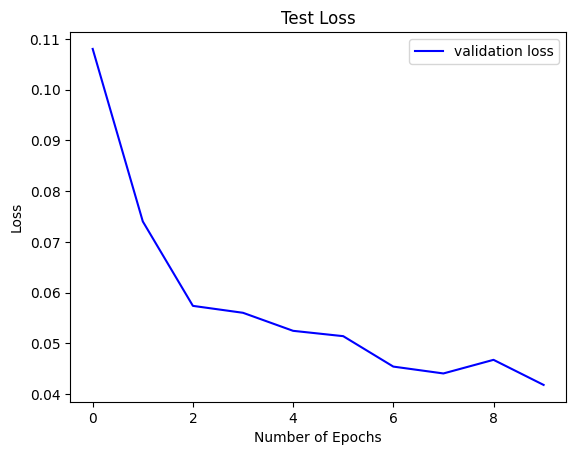

In [36]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 2s 11ms/step


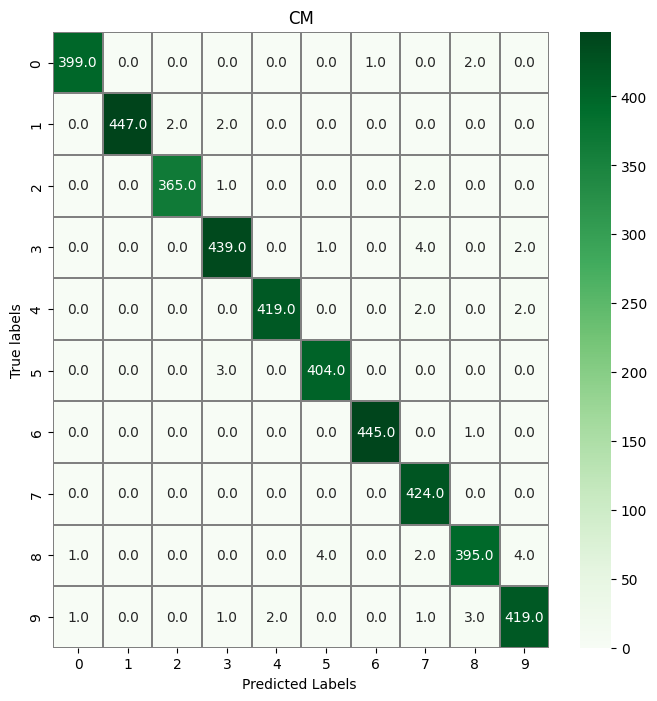

In [38]:
y_pred = cnn_model.predict(X_val)

y_pred_classes = np.argmax(y_pred, axis=1)
Y_true = np.argmax(Y_val, axis =1)
cm = confusion_matrix(Y_true, y_pred_classes)

f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot =True, linewidths = 0.01, cmap='Greens', linecolor='gray', fmt = '.1f', ax = ax)

plt.xlabel('Predicted Labels ')
plt.ylabel('True labels')
plt.title('CM')
plt.show()